# 🚖 Taxi Fare Prediction

This project analyzes NYC taxi trip data to understand travel patterns and build machine learning models that predict taxi fares accurately.

## 🎯 Goal
- Explore factors affecting taxi fare  
- Perform data cleaning and feature engineering  
- Apply EDA to uncover patterns  
- Train and evaluate ML models for fare prediction  

## 📊 Data Includes
- Pickup & dropoff time  
- Location coordinates  
- Trip distance & duration  
- Passenger count & payment type  
- Fare and total amount  

## 🧠 Models Used
- Linear Regression  
- Ridge Regression  
- Random Forest  

## 📈 Outcome
Identify key drivers of taxi pricing and develop a reliable model for fare prediction supported by data insights.


## 1- load moduals

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


## 2-load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv(r'/content/drive/MyDrive/WS Machine learning/Final project /Taxi /taxi.csv')

In [ ]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,40.732407,2,7.5,0.5,0.5,0.0,0.0,0.3,8.8
1,1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,40.716679,1,18.0,0.5,0.5,0.0,0.0,0.3,19.3
2,2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,40.788925,1,33.0,0.5,0.5,0.0,0.0,0.3,34.3
3,3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,40.657333,2,16.5,0.0,0.5,0.0,0.0,0.3,17.3
4,4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,40.758514,2,8.0,0.0,0.5,0.0,0.0,0.3,8.8


In [ ]:
df.tail()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
5453423,5453423,1,2016-01-11 20:30:43,2016-01-11 20:45:41,1,3.70,-73.955360,40.776951,1,N,-73.940315,40.818043,1,14.0,0.5,0.5,3.05,0.0,0.3,18.35
5453424,5453424,1,2016-01-11 20:30:43,2016-01-11 20:37:23,1,1.60,-74.008743,40.719673,1,N,-73.998817,40.736374,1,7.5,0.5,0.5,1.75,0.0,0.3,10.55
5453425,5453425,2,2016-01-11 20:30:43,2016-01-11 20:51:57,1,4.41,-74.004089,40.733177,1,N,-73.958733,40.716782,1,17.5,0.5,0.5,3.76,0.0,0.3,22.56
5453426,5453426,2,2016-01-11 20:30:43,2016-01-11 20:38:14,1,0.87,-73.972198,40.755020,1,N,-73.983994,40.760357,2,6.5,0.5,0.5,0.00,0.0,0.3,7.80
5453427,5453427,1,2016-01-11 20:30:44,2016-01-11 20:33:36,1,0.50,-73.982262,40.768394,1,N,-73.984566,40.762493,1,4.0,0.5,0.5,1.00,0.0,0.3,6.30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5453428 entries, 0 to 5453427
Data columns (total 20 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   VendorID               int64  
 2   tpep_pickup_datetime   object 
 3   tpep_dropoff_datetime  object 
 4   passenger_count        int64  
 5   trip_distance          float64
 6   pickup_longitude       float64
 7   pickup_latitude        float64
 8   RatecodeID             int64  
 9   store_and_fwd_flag     object 
 10  dropoff_longitude      float64
 11  dropoff_latitude       float64
 12  payment_type           int64  
 13  fare_amount            float64
 14  extra                  float64
 15  mta_tax                float64
 16  tip_amount             float64
 17  tolls_amount           float64
 18  improvement_surcharge  float64
 19  total_amount           float64
dtypes: float64(12), int64(5), object(3)
memory usage: 832.1+ MB


In [ ]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,5.453428e+06,5.453428e+06,5.453428e+06,5.453428e+06,5.453428e+06,5.453428e+06,5.453428e+06,5.453428e+06,5.453428e+06,5.453428e+06,5.453428e+06,5.453428e+06,5.453428e+06,5.453428e+06,5.453428e+06,5.453428e+06,5.453428e+06
mean,2.726714e+06,1.420627e+00,1.585565e+00,5.982858e+00,-7.273367e+01,4.006815e+01,1.041010e+00,-7.281107e+01,4.011163e+01,1.359380e+00,1.257271e+01,3.104674e-01,4.975535e-01,1.735782e+00,2.987353e-01,2.997794e-01,1.571502e+01
std,1.574269e+06,4.936597e-01,1.221776e+00,4.084221e+03,9.493997e+00,5.230137e+00,5.782377e-01,9.198467e+00,5.067482e+00,4.976739e-01,1.151806e+01,4.577659e-01,4.124094e-02,2.693649e+00,1.801940e+00,1.100692e-02,1.398361e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,-1.008229e+02,0.000000e+00,1.000000e+00,-1.008229e+02,0.000000e+00,1.000000e+00,-9.576000e+02,-3.564000e+01,-5.000000e-01,-7.000000e+01,-1.740000e+01,-3.000000e-01,-9.584000e+02
25%,1.363357e+06,1.000000e+00,1.000000e+00,1.000000e+00,-7.399147e+01,4.073602e+01,1.000000e+00,-7.399102e+01,4.073458e+01,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.300000e+00
50%,2.726714e+06,1.000000e+00,1.000000e+00,1.700000e+00,-7.398131e+01,4.075355e+01,1.000000e+00,-7.397928e+01,4.075398e+01,1.000000e+00,9.000000e+00,0.000000e+00,5.000000e-01,1.250000e+00,0.000000e+00,3.000000e-01,1.162000e+01
75%,4.090070e+06,2.000000e+00,2.000000e+00,3.100000e+00,-7.396589e+01,4.076802e+01,1.000000e+00,-7.396162e+01,4.076958e+01,2.000000e+00,1.400000e+01,5.000000e-01,5.000000e-01,2.300000e+00,0.000000e+00,3.000000e-01,1.725000e+01
max,5.453427e+06,2.000000e+00,9.000000e+00,8.000010e+06,0.000000e+00,5.726928e+01,9.900000e+01,0.000000e+00,5.274897e+01,4.000000e+00,5.000000e+03,6.488700e+02,3.644000e+01,9.981400e+02,9.235800e+02,3.000000e-01,5.000800e+03


In [ ]:
df.shape

(5453428, 20)

In [ ]:
df.dtypes

,0
Unnamed: 0,int64
VendorID,int64
tpep_pickup_datetime,object
tpep_dropoff_datetime,object
passenger_count,int64
trip_distance,float64
pickup_longitude,float64
pickup_latitude,float64
RatecodeID,int64
store_and_fwd_flag,object


In [ ]:
df.dtypes.value_counts()

,count
float64,12
int64,5
object,3


In [ ]:
columns = df.columns.tolist()
print(columns)

['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'pickup_longitude', 'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount']


## 3-Quilty of data

In [ ]:

def missing(df):
    miss = df.isnull().sum()
    miss = miss[miss > 0]
    if len(miss) == 0:
        print(" No missing values found.")
        return pd.DataFrame()

    pct = (miss / len(df) * 100).round(2)
    report = pd.DataFrame({
        'column': miss.index,
        'num of missing ': miss.values,
        'missing % ': pct.values
    }).sort_values('num of missing ', ascending=False)

    print(f"Number of columns are missing values is : {len(report)}")
    print(  f" Total numbr of missing: {miss.sum():,}")
    return report



In [ ]:
missing(df)

 No missing values found.


""


In [ ]:
print(df.duplicated().sum())

0


In [ ]:
df['total_amount'].min()

-958.4

In [ ]:
df['total_amount'].max()

5000.8

## 4-Feture Engineer

In [ ]:

print(df['tpep_pickup_datetime'].dtype)

object


In [ ]:

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])


In [ ]:
print(df['tpep_pickup_datetime'].dtype)

datetime64[ns]


In [ ]:

df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day_name()


In [ ]:
print(df[['tpep_pickup_datetime', 'pickup_hour']].head())

  tpep_pickup_datetime  pickup_hour
0           2016-01-01            0
1           2016-01-01            0
2           2016-01-01            0
3           2016-01-01            0
4           2016-01-01            0


In [ ]:

print(df['pickup_hour'].value_counts().sort_index())

pickup_hour
0     211974
1     167398
2     129946
3      97045
4      73576
5      64357
6     128010
7     187645
8     235321
9     246810
10    252244
11    282048
12    309395
13    261562
14    280116
15    283808
16    248647
17    275267
18    319134
19    315102
20    302040
21    287534
22    263959
23    230490
Name: count, dtype: int64


In [ ]:
missing(df)

 No missing values found.


""


In [ ]:
df['store_and_fwd_flag'] = df['store_and_fwd_flag'].map({'N': 0, 'Y': 1})

In [ ]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_hour,pickup_day
0,0,2,2016-01-01,2016-01-01,2,1.10,-73.990372,40.734695,1,0,...,2,7.5,0.5,0.5,0.0,0.0,0.3,8.8,0,Friday
1,1,2,2016-01-01,2016-01-01,5,4.90,-73.980782,40.729912,1,0,...,1,18.0,0.5,0.5,0.0,0.0,0.3,19.3,0,Friday
2,2,2,2016-01-01,2016-01-01,1,10.54,-73.984550,40.679565,1,0,...,1,33.0,0.5,0.5,0.0,0.0,0.3,34.3,0,Friday
3,3,2,2016-01-01,2016-01-01,1,4.75,-73.993469,40.718990,1,0,...,2,16.5,0.0,0.5,0.0,0.0,0.3,17.3,0,Friday
4,4,2,2016-01-01,2016-01-01,3,1.76,-73.960625,40.781330,1,0,...,2,8.0,0.0,0.5,0.0,0.0,0.3,8.8,0,Friday


In [ ]:
df['pickup_day'].value_counts()

,count
pickup_day,
Saturday,913294
Thursday,907578
Friday,826791
Tuesday,811191
Monday,737278
Sunday,636347
Wednesday,620949


In [ ]:
# Adding new features calculated using date and time
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek

In [ ]:

df = df.drop(columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime' ,'Unnamed: 0'])

In [ ]:
import pandas as pd


zones_lookup_url = "https://d37ci6vzurychx.cloudfront.net/misc/taxi_zone_lookup.csv"
zones_lookup = pd.read_csv(zones_lookup_url)


print(zones_lookup.head())
print(zones_lookup.shape)
print(zones_lookup.columns)        # : ['LocationID', 'Borough', 'Zone', 'service_zone']

   LocationID        Borough                     Zone service_zone
0           1            EWR           Newark Airport          EWR
1           2         Queens              Jamaica Bay    Boro Zone
2           3          Bronx  Allerton/Pelham Gardens    Boro Zone
3           4      Manhattan            Alphabet City  Yellow Zone
4           5  Staten Island            Arden Heights    Boro Zone
(265, 4)
Index(['LocationID', 'Borough', 'Zone', 'service_zone'], dtype='object')


In [ ]:
import geopandas as gpd

# URL of the shapefile (ZIP file)
shapefile_url = "https://d37ci6vzurychx.cloudfront.net/misc/taxi_zones.zip"

# Read the shapefile directly (GeoPandas can read ZIP files automatically)
taxi_zones = gpd.read_file(shapefile_url)

# Check the Coordinate Reference System (CRS)
print(taxi_zones.crs)  # Expected to be EPSG:4326, otherwise we convert it

# Convert CRS to EPSG:4326 (WGS84 - latitude/longitude)
taxi_zones = taxi_zones.to_crs(epsg=4326)

# Preview the first rows of the data
print(taxi_zones.head())

# Display column names
print(taxi_zones.columns)  # Important: includes 'LocationID'


In [ ]:
from shapely.geometry import Point
import geopandas as gpd
import numpy as np

def coords_to_location_id(longitudes, latitudes, zones_gdf):
    # Create Point geometries from longitude and latitude
    points = [Point(xy) for xy in zip(longitudes, latitudes)]

    # Convert points into a GeoSeries with WGS84 CRS
    points_geo_series = gpd.GeoSeries(points, crs="EPSG:4326")

    # Perform spatial join to match each point with its taxi zone
    joined = gpd.sjoin(
        gpd.GeoDataFrame(geometry=points_geo_series, crs="EPSG:4326"),
        zones_gdf[['LocationID', 'geometry']],
        how="left",
        predicate="within"
    )

    # Return matched LocationID values
    return joined['LocationID'].values


# Apply function to pickup coordinates
df['pickup_location_id'] = coords_to_location_id(
    df['pickup_longitude'],
    df['pickup_latitude'],
    taxi_zones
)

# Apply function to dropoff coordinates
df['dropoff_location_id'] = coords_to_location_id(
    df['dropoff_longitude'],
    df['dropoff_latitude'],
    taxi_zones
)


In [ ]:
# Merge with lookup table for pickup locations
df = df.merge(
    zones_lookup[['LocationID', 'Borough', 'Zone', 'service_zone']],
    left_on='pickup_location_id',
    right_on='LocationID',
    how='left'
).rename(columns={
    'Borough': 'pickup_borough',
    'Zone': 'pickup_zone',
    'service_zone': 'pickup_service_zone'
}).drop(columns=['LocationID'])


# Merge with lookup table for dropoff locations
df = df.merge(
    zones_lookup[['LocationID', 'Borough', 'Zone', 'service_zone']],
    left_on='dropoff_location_id',
    right_on='LocationID',
    how='left'
).rename(columns={
    'Borough': 'dropoff_borough',
    'Zone': 'dropoff_zone',
    'service_zone': 'dropoff_service_zone'
}).drop(columns=['LocationID'])


In [ ]:
# Top 10 most common pickup zones
print(df['pickup_zone'].value_counts().head(10))

# Pickup counts by borough
print(df['pickup_borough'].value_counts())

# Random samples of pickup and dropoff locations
print(
    df[['pickup_zone', 'pickup_borough', 'dropoff_zone', 'dropoff_borough']]
    .sample(8)
)


pickup_zone
Upper East Side South           205846
Midtown Center                  196929
Upper East Side North           193997
Midtown East                    180351
Union Sq                        179225
Times Sq/Theatre District       178795
East Village                    178527
Penn Station/Madison Sq West    178293
Murray Hill                     172961
Clinton East                    166682
Name: count, dtype: int64
pickup_borough
Manhattan        4903683
Queens            316718
Brooklyn           94743
Bronx               4493
EWR                  124
Staten Island         39
Name: count, dtype: int64
                           pickup_zone pickup_borough         dropoff_zone  \
4304936               Garment District      Manhattan         Central Park   
4400063                       Union Sq      Manhattan          Murray Hill   
998596               LaGuardia Airport         Queens      Lenox Hill West   
3511839                   Clinton East      Manhattan                

In [ ]:
df.head()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,...,trip_duration,pickup_dayofweek,pickup_location_id,dropoff_location_id,pickup_borough,pickup_zone,pickup_service_zone,dropoff_borough,dropoff_zone,dropoff_service_zone
0,2,2,5.52,-73.980118,40.743050,1,0,-73.913490,40.763142,2,...,18.50,4,170.0,7.0,Manhattan,Murray Hill,Yellow Zone,Queens,Astoria,Boro Zone
1,2,2,7.45,-73.994057,40.719990,1,0,-73.966362,40.789871,2,...,26.75,4,148.0,238.0,Manhattan,Lower East Side,Yellow Zone,Manhattan,Upper West Side North,Yellow Zone
2,1,1,1.20,-73.979424,40.744614,1,0,-73.992035,40.753944,2,...,11.90,4,170.0,100.0,Manhattan,Murray Hill,Yellow Zone,Manhattan,Garment District,Yellow Zone
3,1,1,6.00,-73.947151,40.791046,1,0,-73.920769,40.865578,2,...,11.20,4,75.0,127.0,Manhattan,East Harlem South,Boro Zone,Manhattan,Inwood,Boro Zone
4,2,1,3.21,-73.998344,40.723896,1,0,-73.995850,40.688400,2,...,11.10,4,211.0,52.0,Manhattan,SoHo,Yellow Zone,Brooklyn,Cobble Hill,Boro Zone


In [ ]:
df['same_borough'] = (df['pickup_borough'] == df['dropoff_borough']).astype(int)

## 5-EDA

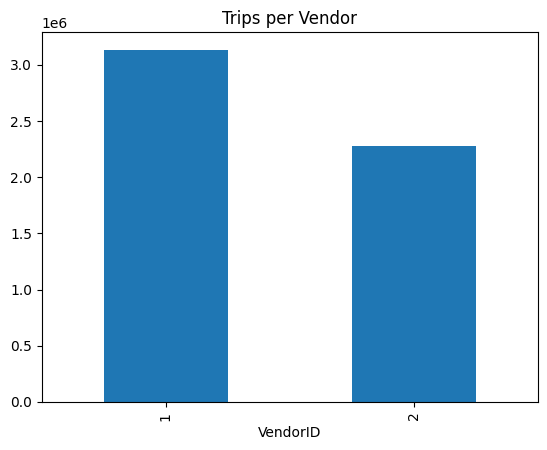

In [ ]:
df.groupby('VendorID').size().plot(kind='bar')
plt.title("Trips per Vendor")
plt.show()

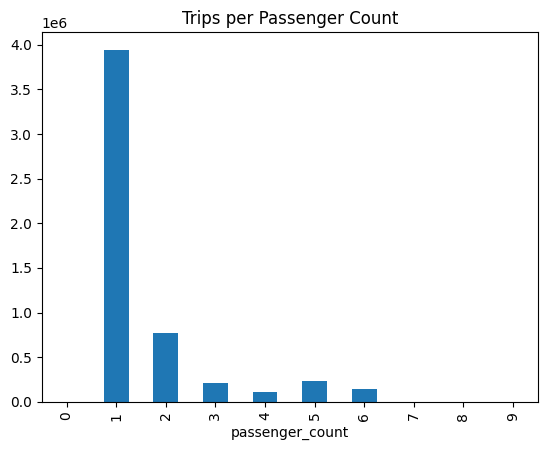

In [ ]:
df.groupby('passenger_count').size().plot(kind='bar')
plt.title("Trips per Passenger Count")
plt.show()

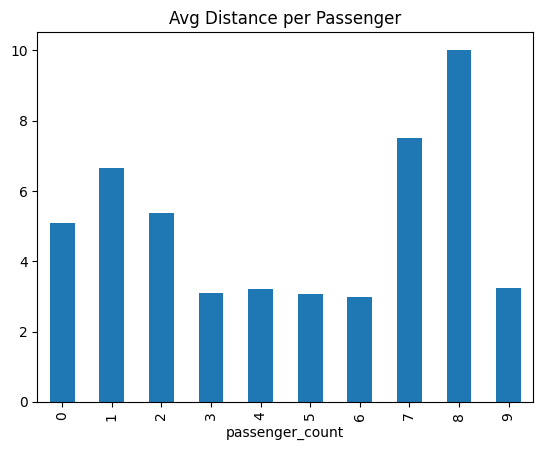

In [ ]:
df.groupby('passenger_count')['trip_distance'].mean().plot(kind='bar')
plt.title("Avg Distance per Passenger")
plt.show()

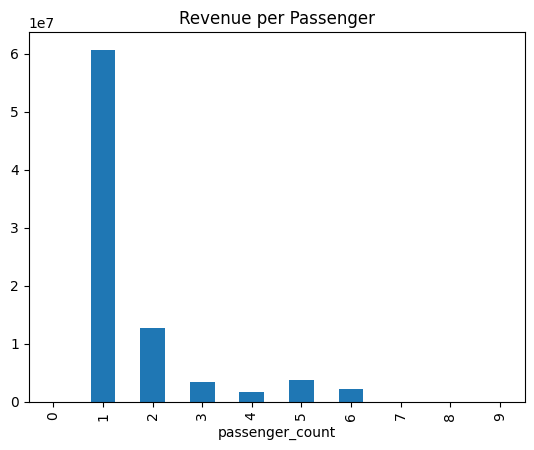

In [ ]:
df.groupby('passenger_count')['total_amount'].sum().plot(kind='bar')
plt.title("Revenue per Passenger")
plt.show()

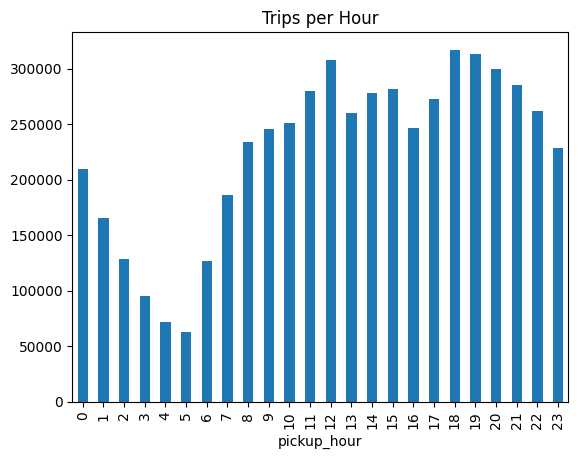

In [ ]:
df.groupby('pickup_hour').size().plot(kind='bar')
plt.title("Trips per Hour")
plt.show()

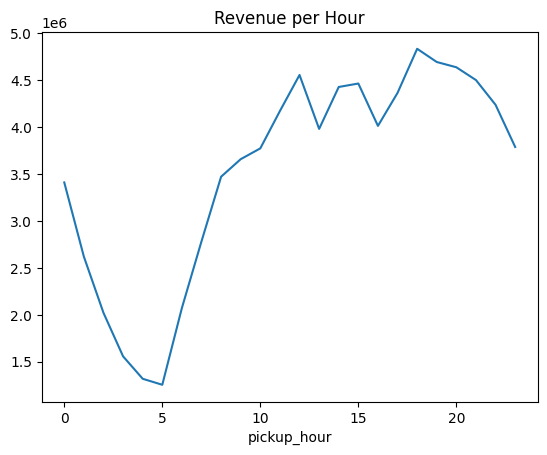

In [ ]:
df.groupby('pickup_hour')['total_amount'].sum().plot(kind='line')
plt.title("Revenue per Hour")
plt.show()

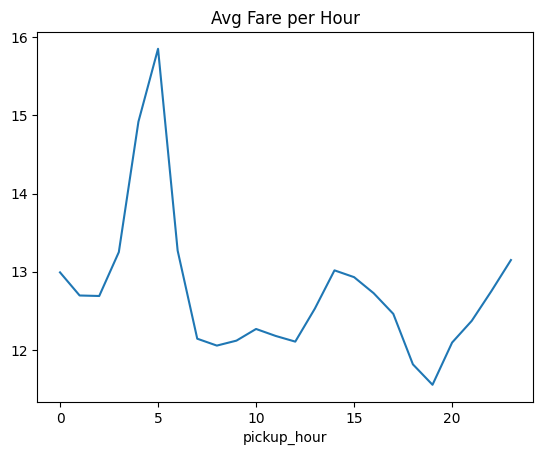

In [ ]:
df.groupby('pickup_hour')['fare_amount'].mean().plot(kind='line')
plt.title("Avg Fare per Hour")
plt.show()

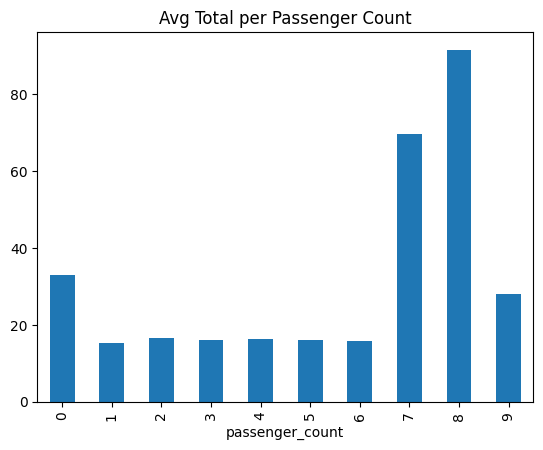

In [ ]:
df.groupby('passenger_count')['total_amount'].mean().plot(kind='bar', title='Avg Total per Passenger Count')
plt.show()

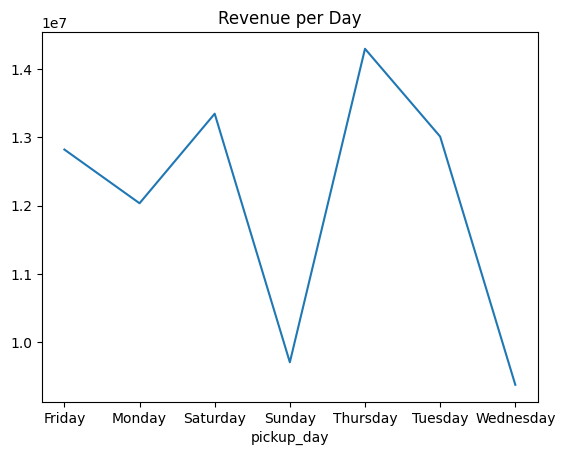

In [ ]:
df.groupby('pickup_day')['total_amount'].sum().plot(kind='line', title='Revenue per Day')
plt.show()

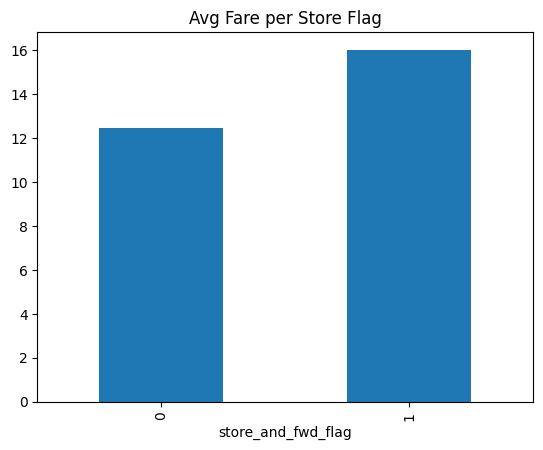

In [ ]:
df.groupby('store_and_fwd_flag')['fare_amount'].mean().plot(kind='bar', title='Avg Fare per Store Flag')
plt.show()

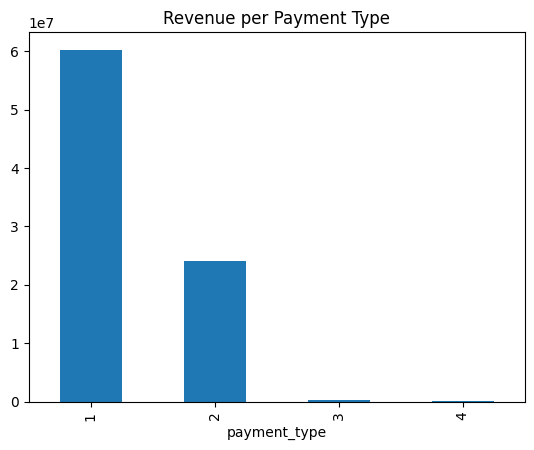

In [ ]:
df.groupby('payment_type')['total_amount'].sum().plot(kind='bar', title='Revenue per Payment Type')
plt.show()

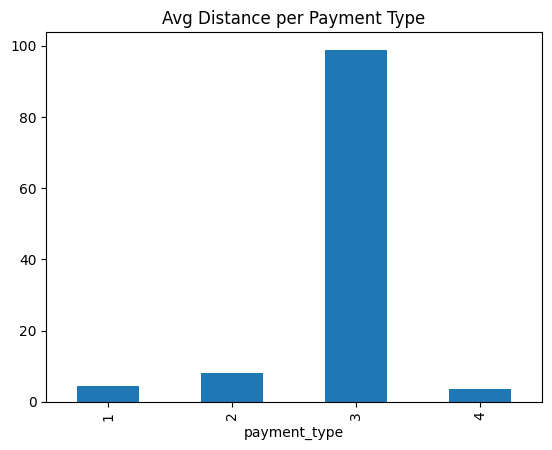

In [ ]:
df.groupby('payment_type')['trip_distance'].mean().plot(kind='bar', title='Avg Distance per Payment Type')
plt.show()

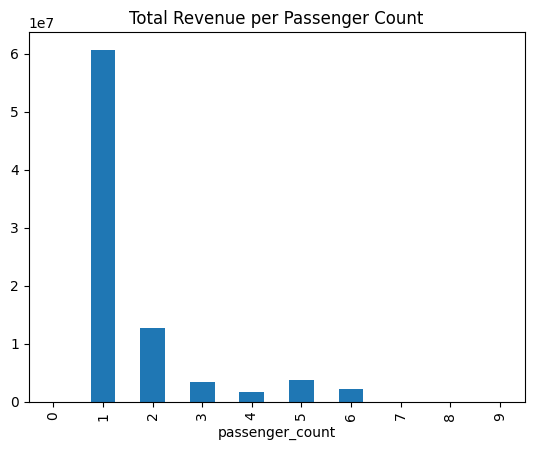

In [ ]:
df.groupby('passenger_count')['total_amount'].sum().plot(kind='bar', title='Total Revenue per Passenger Count')
plt.show()

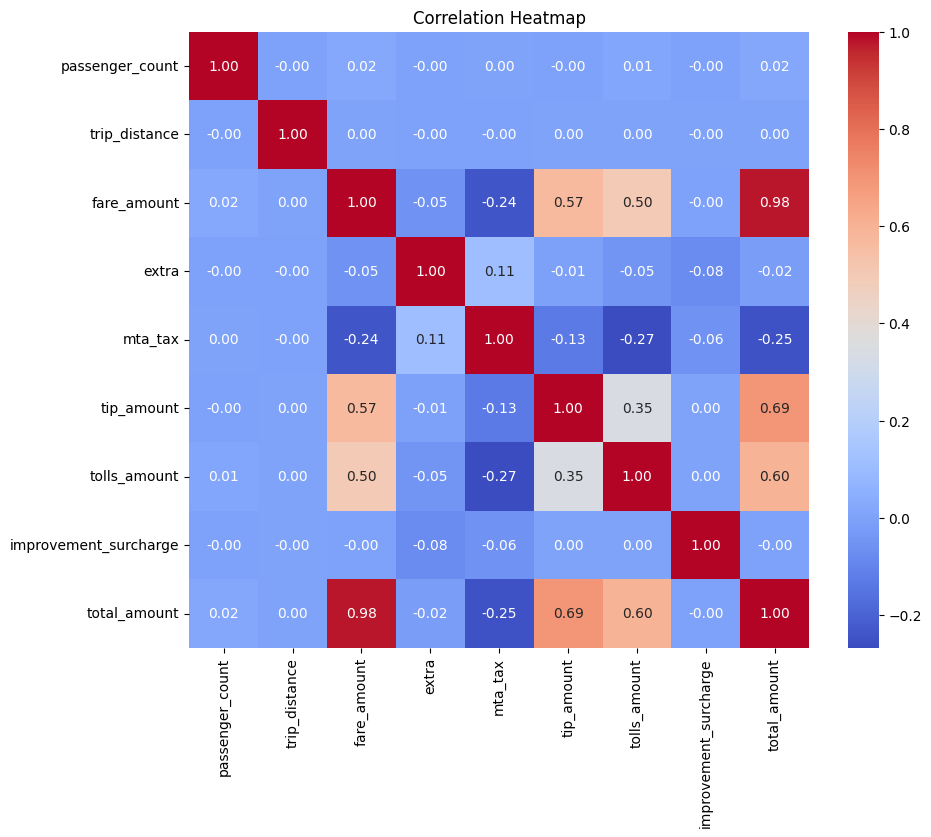

In [ ]:
numeric_cols = ['passenger_count', 'trip_distance', 'fare_amount', 'extra','mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount']

corr_matrix = df[numeric_cols].corr()


plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

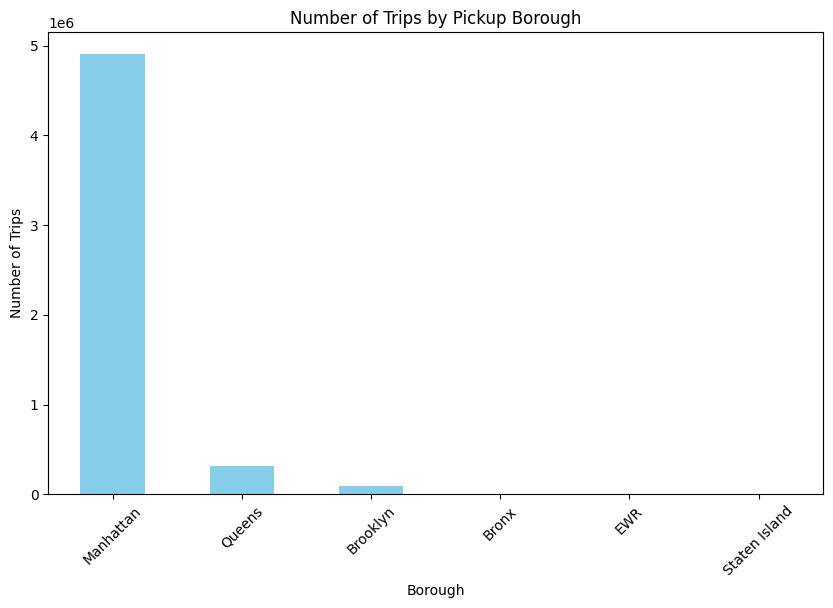

In [ ]:
plt.figure(figsize=(10, 6))
df['pickup_borough'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Trips by Pickup Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()


In [ ]:
def trip_type(row):
    if pd.isna(row['pickup_borough']) or pd.isna(row['dropoff_borough']):
        return 'Unknown'
    if row['pickup_borough'] == 'Manhattan' and row['dropoff_borough'] == 'Manhattan':
        return 'Within Manhattan'
    if row['pickup_borough'] != 'Manhattan' and row['dropoff_borough'] == 'Manhattan':
        return 'To Manhattan'
    if row['pickup_borough'] == 'Manhattan' and row['dropoff_borough'] != 'Manhattan':
        return 'From Manhattan'
    return 'Outside Manhattan'


df['trip_type'] = df.apply(trip_type, axis=1)

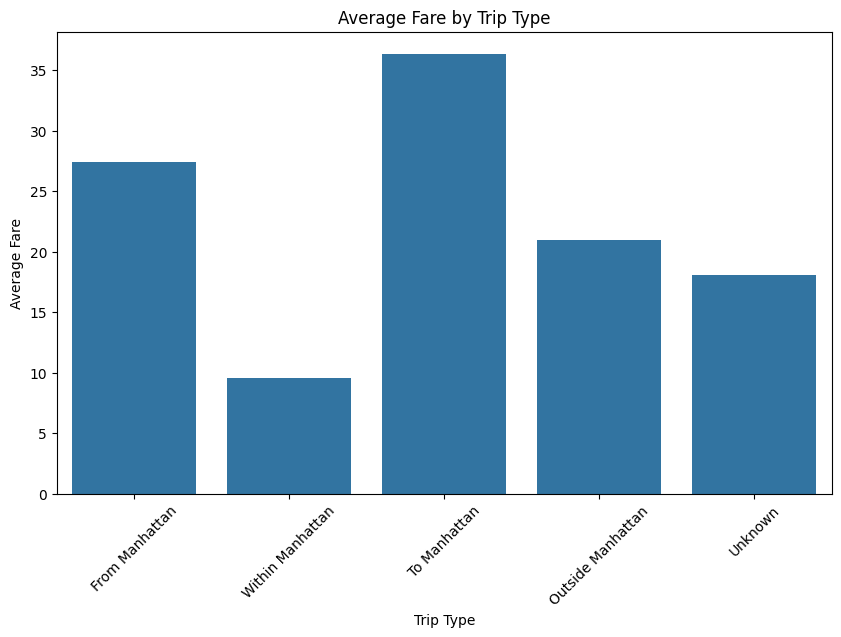

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='trip_type', y='fare_amount', data=df, estimator='mean', errorbar=None)
plt.title('Average Fare by Trip Type')
plt.xlabel('Trip Type')
plt.ylabel('Average Fare')
plt.xticks(rotation=45)
plt.show()


In [ ]:
df['manhattan_only'] = 0

valid = df['pickup_borough'].notna() & df['dropoff_borough'].notna()
df.loc[valid, 'manhattan_only'] = (
    (df.loc[valid, 'pickup_borough'] == 'Manhattan') &
    (df.loc[valid, 'dropoff_borough'] == 'Manhattan')
).astype(int)

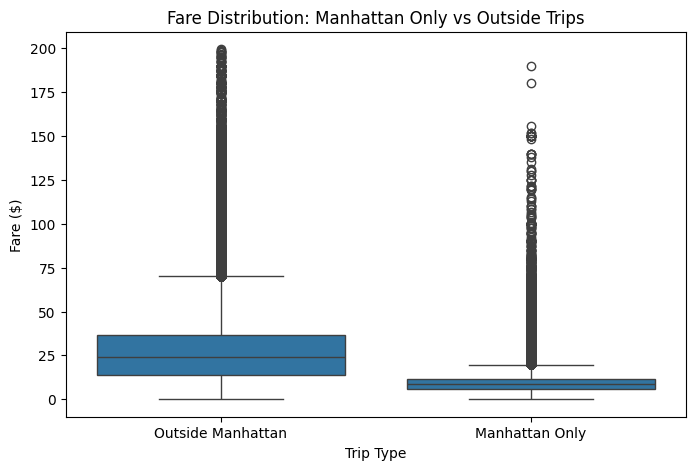

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='manhattan_only', y='fare_amount', data=df)
plt.title('Fare Distribution: Manhattan Only vs Outside Trips')
plt.xticks([0, 1], ['Outside Manhattan', 'Manhattan Only'])
plt.xlabel('Trip Type')
plt.ylabel('Fare ($)')
plt.show()


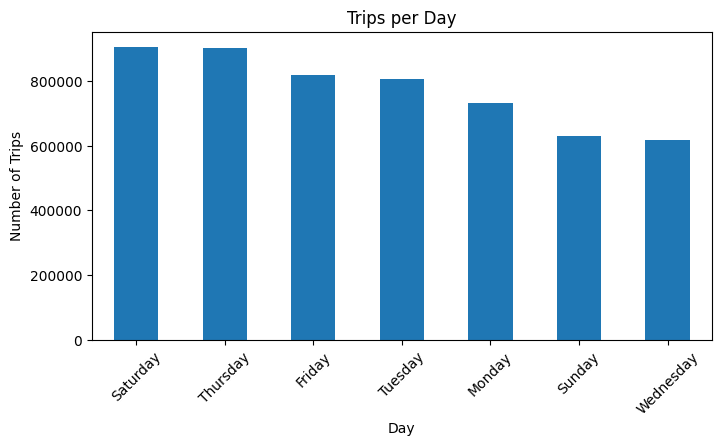

In [ ]:
daily_trips = df.groupby('pickup_day').size().sort_values(ascending=False)

plt.figure(figsize=(8,4))
daily_trips.plot(kind='bar')
plt.title('Trips per Day')
plt.xlabel('Day')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()


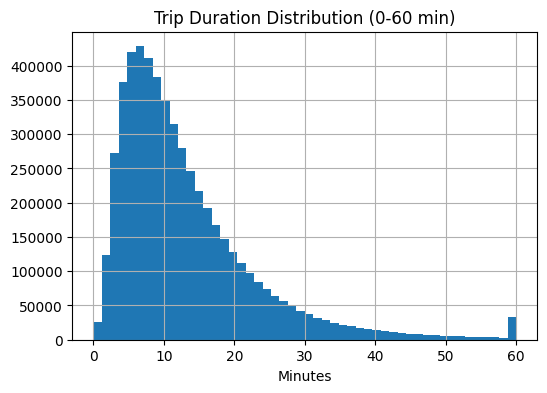

In [ ]:
plt.figure(figsize=(6,4))
df['trip_duration'].clip(0,60).hist(bins=50)
plt.title('Trip Duration Distribution (0-60 min)')
plt.xlabel('Minutes')
plt.show()


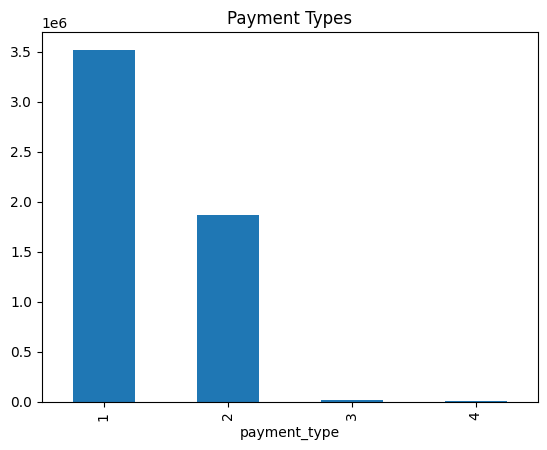

In [ ]:
df['payment_type'].value_counts().plot(kind='bar')
plt.title('Payment Types')
plt.show()


In [ ]:
# Map payment codes to clear English names
payment_mapping = {
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute / Complaint',
    5: 'Unknown',
    6: 'Canceled Trip'
}

# Create a new column with readable payment names
df['payment_type_name'] = df['payment_type'].map(payment_mapping)




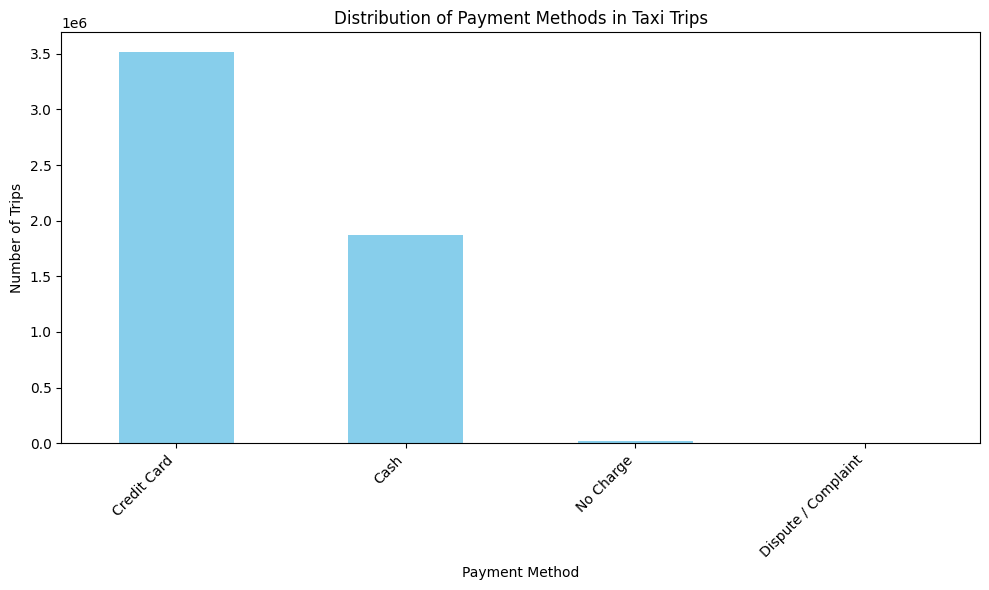

In [ ]:
# Plot a clear bar chart
plt.figure(figsize=(10, 6))
df['payment_type_name'].value_counts().plot(kind='bar', color='skyblue')

plt.title('Distribution of Payment Methods in Taxi Trips')
plt.xlabel('Payment Method')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



<Axes: xlabel='trip_duration', ylabel='fare_amount'>

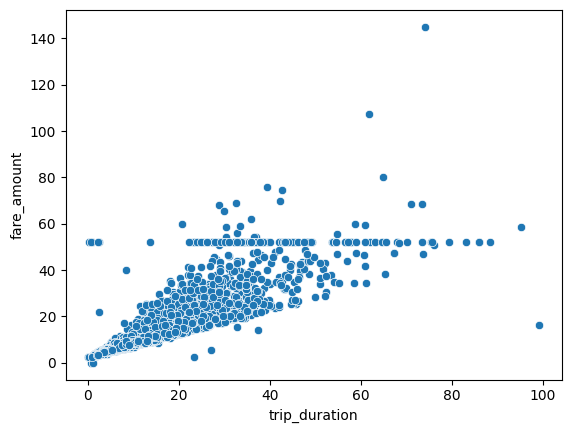

In [ ]:
sns.scatterplot(x='trip_duration', y='fare_amount', data=df.sample(5000))


## 6-Data Cleaning

## Handling Missing Values (NULLs)

### 1. NULLs > 75–90% → **Delete the Column**
- Too much missing data.
- The column is usually not reliable.
- **Action:** Drop the column.

---

### 2. NULLs between 50–74% → **Evaluate Before Dropping**
Depends on:
- Importance of the column.
- Whether NULL has a real meaning.
- Whether missing values can be filled safely.

**Action:**  
- Carefully evaluate the column.
- Decide to keep or drop based on analysis.

---

### 3. NULLs between 20–49% → **Keep and Handle**
- The column is usually still useful.
- Missing values can be handled using:
  - Mean
  - Median
  - Mode
  - Model-based imputation

**Action:** Impute missing values.

---

### 4. NULLs < 20% → **Keep**
- Very normal percentage of missing data.
- Easy to clean.

**Action:**  
- Fill missing values, or  
- Drop a small number of rows.


In [ ]:
# remove outliers
df = df[(df['fare_amount'] > 0) & (df['fare_amount'] < 200)]
df = df[(df['trip_duration'] > 0) & (df['trip_duration'] < 120)]

In [ ]:

df = df[df['fare_amount'] > 0]


df = df[df['trip_distance'] > 0]


df = df[df['trip_duration'] > 0]


df = df[df['fare_amount'] < 200]


df = df[df['trip_duration'] < 120]


df = df.drop_duplicates()


In [ ]:
missing(df)

Number of columns are missing values is : 8
 Total numbr of missing: 705,796


,column,num of missing,missing %
0,pickup_location_id,89234,1.65
2,pickup_borough,89234,1.65
3,pickup_zone,89234,1.65
4,pickup_service_zone,89234,1.65
1,dropoff_location_id,87215,1.61
5,dropoff_borough,87215,1.61
6,dropoff_zone,87215,1.61
7,dropoff_service_zone,87215,1.61


In [ ]:
df = df.dropna( subset=['pickup_borough', 'dropoff_borough'])

In [ ]:
missing(df)

 No missing values found.


""


## 7-Modals

In [ ]:
features = [
    'pickup_hour',
    'pickup_dayofweek',
    'passenger_count',
    'trip_distance',
    'trip_duration',
    'payment_type'
]

In [ ]:
target = 'fare_amount'

In [ ]:
X = df[features]
y = df[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
num_features = [
    'pickup_hour',
    'pickup_dayofweek',
    'passenger_count',
    'trip_distance',
    'trip_duration'
]

In [ ]:
cat_features = ['payment_type']

In [ ]:
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

In [ ]:
model = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', LinearRegression())
])


In [ ]:
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['pickup_hour',
                                                   'pickup_dayofweek',
                                                   'passenger_count',
                                                   'trip_distance',
                                                   'trip_duration']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['payment_type'])])),
                ('regressor', LinearRegression())])

In [ ]:
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R2 Score:", r2)


RMSE: 4.8987478361827135
R2 Score: 0.7616075991476503


In [ ]:
df['is_weekend'] = df['pickup_dayofweek'].isin([5, 6]).astype(int)
df['is_rush_hour'] = df['pickup_hour'].isin([7,8,9,16,17,18,19]).astype(int)

In [ ]:
features = [
    'pickup_hour',
    'pickup_dayofweek',
    'is_weekend',
    'is_rush_hour',
    'passenger_count',
    'trip_distance',
    'trip_duration',
    'payment_type',
    'same_borough',
    'manhattan_only',
    'store_and_fwd_flag',
    'trip_type'
]

In [ ]:
target = 'fare_amount'

X = df[features]
y = df[target]



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
num_features = [
    'pickup_hour',
    'pickup_dayofweek',
    'passenger_count',
    'trip_distance',
    'trip_duration',
    'same_borough',
    'manhattan_only',
    'store_and_fwd_flag'
]

In [ ]:
cat_features = [
    'payment_type',
    'is_weekend',
    'is_rush_hour',
    'trip_type'
]

In [ ]:

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

In [ ]:

from sklearn.linear_model import Ridge


In [ ]:

model = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', Ridge(alpha=1.0))
])

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Improved Linear RMSE:", rmse)
print("Improved Linear R2:", r2)

Improved Linear RMSE: 4.094546893410062
Improved Linear R2: 0.8334541034644423


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# model
rf_model = Pipeline([ ('preprocessing', preprocessor),('regressor', RandomForestRegressor( n_estimators=100, max_depth=12, random_state=42) ) ])


In [ ]:
# train
rf_model.fit(X_train, y_train)



Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['pickup_hour',
                                                   'pickup_dayofweek',
                                                   'passenger_count',
                                                   'trip_distance',
                                                   'trip_duration',
                                                   'same_borough',
                                                   'manhattan_only',
                                                   'store_and_fwd_flag']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['payment_type', 'is_weekend',
                                                   'is_rush_hour',
                                                   'trip_type'])])),
                ('regressor',
                 RandomForestRegressor(max_depth=12, random_state=42))])

In [ ]:
# predict
y_pred_rf = rf_model.predict(X_test)



In [ ]:
# evaluation
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)



In [ ]:
print("Random Forest RMSE:", rmse_rf)
print("Random Forest R2:", r2_rf)

Random Forest RMSE: 2.127789779993586
Random Forest R2: 0.9584446975998581


In [ ]:
# feature importance
ohe = rf_model.named_steps['preprocessing'].named_transformers_['cat']
encoded_cat = ohe.get_feature_names_out(cat_features)

all_features = num_features + list(encoded_cat)

importances = rf_model.named_steps['regressor'].feature_importances_

feat_imp = pd.DataFrame({
    'feature': all_features,
    'importance': importances
}).sort_values('importance', ascending=False)

print(feat_imp.head(15))


                        feature  importance
3                 trip_distance    0.815220
4                 trip_duration    0.167388
19            trip_type_Unknown    0.007188
8                payment_type_1    0.002889
0                   pickup_hour    0.001959
1              pickup_dayofweek    0.000883
17  trip_type_Outside Manhattan    0.000730
20   trip_type_Within Manhattan    0.000555
6                manhattan_only    0.000508
2               passenger_count    0.000485
18       trip_type_To Manhattan    0.000467
5                  same_borough    0.000374
10               payment_type_3    0.000261
16     trip_type_From Manhattan    0.000248
9                payment_type_2    0.000238


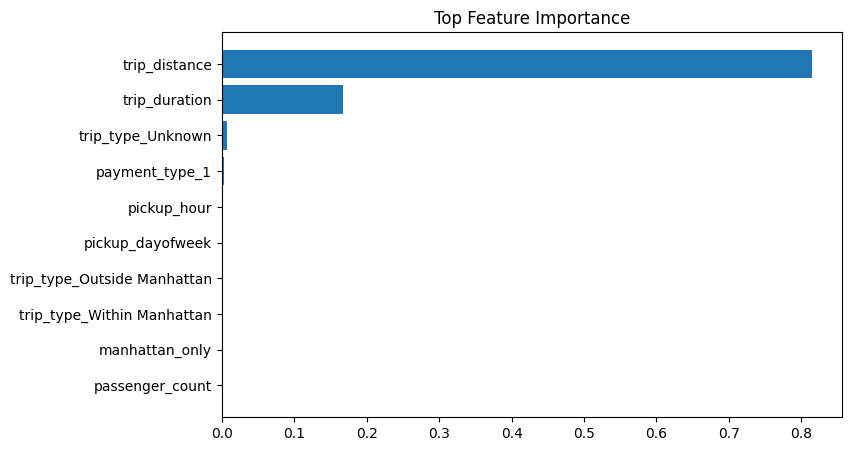

In [ ]:
plt.figure(figsize=(8,5))
plt.barh(feat_imp['feature'][:10], feat_imp['importance'][:10])
plt.gca().invert_yaxis()
plt.title("Top Feature Importance")
plt.show()


In [ ]:
# =========================
# Features (after removal)
# =========================

features = [
    'trip_distance',
    'trip_duration'
]


target = 'fare_amount'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


num_features = [
    'trip_distance',
    'trip_duration'
]


preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features)
])


# =========================
# Linear Regression
# =========================

model = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', LinearRegression())
])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Linear RMSE:", rmse)
print("Linear R2:", r2)

Linear RMSE: 4.942016481037608
Linear R2: 0.7573777550315623


In [ ]:
# =========================
# Random Forest
# =========================

rf_model = Pipeline([
    ('preprocessing', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=100,
        max_depth=12,
        random_state=42
    ))
])

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest RMSE:", rmse_rf)
print("Random Forest R2:", r2_rf)


Random Forest RMSE: 2.3859487133846304
Random Forest R2: 0.9477494076642577


In [ ]:
# train predictions
y_train_pred = rf_model.predict(X_train)

rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

print("Train RMSE:", rmse_train)
print("Train R2:", r2_train)


Train RMSE: 2.2293435755653785
Train R2: 0.9543468294514194


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


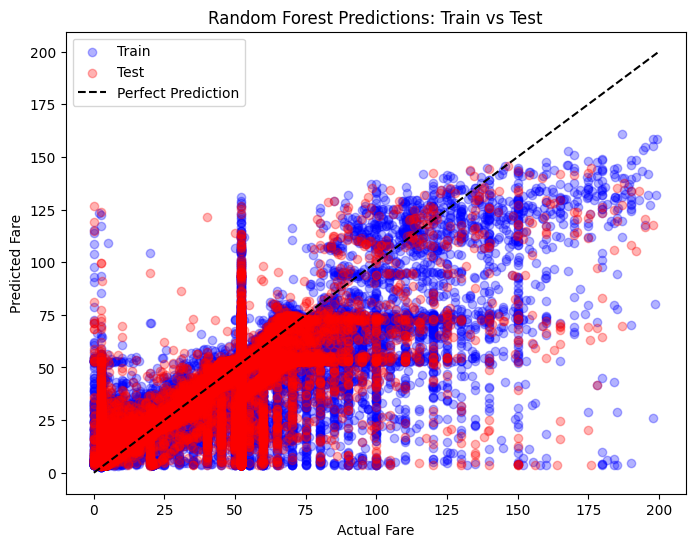

In [ ]:
plt.figure(figsize=(8,6))

# Scatter plot: predicted vs actual
plt.scatter(y_train, rf_model.predict(X_train), alpha=0.3, label='Train', color='blue')
plt.scatter(y_test, rf_model.predict(X_test), alpha=0.3, label='Test', color='red')

# Reference line y = x
plt.plot([0, max(y)], [0, max(y)], color='black', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Random Forest Predictions: Train vs Test')
plt.legend()
plt.show()
